In [374]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [375]:
df_account = pd.read_csv('twm_accounts.csv', sep = ';')
df_check = pd.read_csv('twm_checking_acct.csv', sep = ';')
df_check_trans = pd.read_csv('twm_checking_tran.csv', sep = ';')
df_credit = pd.read_csv('twm_credit_acct.csv', sep = ';')
df_check_trans = pd.read_csv('twm_credit_tran.csv', sep = ';')
df_trans = pd.read_csv('twm_transactions.csv', sep = ';')
df_saving = pd.read_csv('twm_savings_acct.csv', sep = ';')
df_saving_trans = pd.read_csv('twm_savings_tran.csv', sep = ';')
df_cust = pd.read_csv('twm_customer.csv', sep = ';')

In [376]:
df_cust.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [377]:
df_account.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [378]:
df_saving.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [379]:
df_saving_trans.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [380]:
df_saving

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [381]:
df_saving['saved_amount'] = df_saving['ending_balance'] - df_saving['starting_balance']

<AxesSubplot:ylabel='Frequency'>

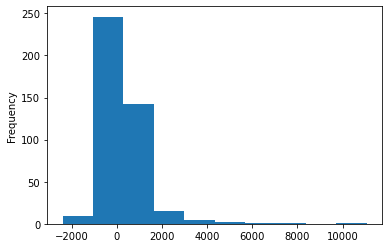

In [382]:
df_saving['saved_amount'].plot.hist()

In [383]:
saving_columns = ['cust_id', 'account_active', 'saved_amount', 'minimum_balance', 'acct_type']
df_saving_1 = df_saving[saving_columns]

In [384]:
# Removing space from the column
df_saving_1['account_active'] = df_saving_1['account_active'].str.strip()

<ipython-input-384-170c299d524c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [385]:
# keeping columns where the customer has saving account
df_saving_1 = df_saving_1[df_saving_1['account_active'] == 'Y']

In [386]:
df_saving_1

,cust_id,account_active,saved_amount,minimum_balance,acct_type
0,1363160,Y,9.50,100,BS
2,1362548,Y,3.78,100,BS
3,1362752,Y,9.07,100,BS
5,1362609,Y,-709.02,500,MM
6,1363465,Y,17.44,500,MM
...,...,...,...,...,...
416,1363141,Y,351.24,100,BS
417,1363038,Y,174.73,100,BS
418,1362529,Y,211.08,100,BS
419,1362895,Y,-73.71,100,BS


In [387]:
#cust_saving_df = pd.merge(df_cust, df_saving_1, on = 'cust_id')

In [388]:
#cust_saving_df.head()

In [389]:
#cust_saving_df.drop('name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name', 'postal_code', 'city_name')

In [390]:
df_saving_trans.groupby(by='cust_id').count()['tran_id']

cust_id
1362480    26
1362484    33
1362486    25
1362487    19
1362489    22
           ..
1363490    12
1363491    18
1363492    25
1363493    19
1363495    36
Name: tran_id, Length: 420, dtype: int64

In [391]:
df_x = df_saving_trans.groupby(by='cust_id').count()['tran_id']

In [392]:
df_x['cust_id'] = df_x.index

In [393]:
df_x['cust_id']

Int64Index([1362480, 1362484, 1362486, 1362487, 1362489, 1362496, 1362497,
            1362498, 1362500, 1362502,
            ...
            1363471, 1363474, 1363481, 1363482, 1363485, 1363490, 1363491,
            1363492, 1363493, 1363495],
           dtype='int64', name='cust_id', length=420)

In [394]:
df_saving_2 = pd.merge(df_x, df_saving_1, on= 'cust_id')
df_saving_2.rename(columns={'tran_id_y':'saving_num_trans'}, inplace = True)

In [395]:
df_saving_2

,cust_id,tran_id,account_active,saved_amount,minimum_balance,acct_type
0,1362480,26,Y,480.88,100,BS
1,1362484,33,Y,1927.41,100,BS
2,1362486,25,Y,-168.24,100,BS
3,1362489,22,Y,-386.59,100,BS
4,1362496,12,Y,3.72,100,BS
...,...,...,...,...,...,...
370,1363482,33,Y,364.55,100,BS
371,1363485,12,Y,2.36,100,BS
372,1363490,12,Y,34.24,100,BS
373,1363492,25,Y,163.72,100,BS


In [396]:
#df_saving_2.drop(columns = ['tran_id_x', 'saving_trans'], inplace = True)

In [397]:
df_saving_2.rename(columns={'tran_id':'saving_num_trans'}, inplace = True)

In [398]:
df_saving_2

,cust_id,saving_num_trans,account_active,saved_amount,minimum_balance,acct_type
0,1362480,26,Y,480.88,100,BS
1,1362484,33,Y,1927.41,100,BS
2,1362486,25,Y,-168.24,100,BS
3,1362489,22,Y,-386.59,100,BS
4,1362496,12,Y,3.72,100,BS
...,...,...,...,...,...,...
370,1363482,33,Y,364.55,100,BS
371,1363485,12,Y,2.36,100,BS
372,1363490,12,Y,34.24,100,BS
373,1363492,25,Y,163.72,100,BS


In [399]:
# drop cust_id and account_active
df_saving_3 = df_saving_2.drop(columns = ['cust_id', 'account_active'])

In [400]:
df_saving_3.head()

,saving_num_trans,saved_amount,minimum_balance,acct_type
0,26,480.88,100,BS
1,33,1927.41,100,BS
2,25,-168.24,100,BS
3,22,-386.59,100,BS
4,12,3.72,100,BS


In [401]:
acct_type_dummy = pd.get_dummies(df_saving_3['acct_type'])

In [402]:
df_saving_3 = pd.concat([df_saving_3, acct_type_dummy], axis =1 )

In [403]:
df_saving_3.head()

,saving_num_trans,saved_amount,minimum_balance,acct_type,BS,MM
0,26,480.88,100,BS,1,0
1,33,1927.41,100,BS,1,0
2,25,-168.24,100,BS,1,0
3,22,-386.59,100,BS,1,0
4,12,3.72,100,BS,1,0


In [404]:
acct_type_dummy = pd.get_dummies(df_saving_3['minimum_balance'])

In [405]:
df_saving_3 = pd.concat([df_saving_3, acct_type_dummy], axis =1 )

In [406]:
df_saving_3

,saving_num_trans,saved_amount,minimum_balance,acct_type,BS,MM,100,500
0,26,480.88,100,BS,1,0,1,0
1,33,1927.41,100,BS,1,0,1,0
2,25,-168.24,100,BS,1,0,1,0
3,22,-386.59,100,BS,1,0,1,0
4,12,3.72,100,BS,1,0,1,0
...,...,...,...,...,...,...,...,...
370,33,364.55,100,BS,1,0,1,0
371,12,2.36,100,BS,1,0,1,0
372,12,34.24,100,BS,1,0,1,0
373,25,163.72,100,BS,1,0,1,0


In [369]:
df_saving_3.drop(columns = ['acct_type', 'minimum_balance'], inplace = True)

In [409]:
#Converting all column name to string
df_saving_3.columns = df_saving_3.columns.map(str)

,saving_num_trans,saved_amount,BS,MM,100,500
0,26,480.88,1,0,1,0
1,33,1927.41,1,0,1,0
2,25,-168.24,1,0,1,0
3,22,-386.59,1,0,1,0
4,12,3.72,1,0,1,0
...,...,...,...,...,...,...
370,33,364.55,1,0,1,0
371,12,2.36,1,0,1,0
372,12,34.24,1,0,1,0
373,25,163.72,1,0,1,0


In [413]:
# removing white space from colum name
df_saving_3.columns = df_saving_3.columns.str.replace(' ', '')

In [414]:
df_saving_3.columns

Index(['saving_num_trans', 'saved_amount', 'minimum_balance', 'acct_type',
       'BS', 'MM', '100', '500'],
      dtype='object')

In [415]:
df_saving_3.drop(columns = ['acct_type', 'minimum_balance', 'MM', '500'], inplace = True)

In [416]:
df_saving_3.head()

,saving_num_trans,saved_amount,BS,100
0,26,480.88,1,1
1,33,1927.41,1,1
2,25,-168.24,1,1
3,22,-386.59,1,1
4,12,3.72,1,1


In [417]:
# columns which require scaling
scaling_column = ['saving_num_trans', 'saved_amount']
df_saving_3_for_scale = df_saving_3[scaling_column]

In [436]:
non_scaling_column = ['BS', '100']

In [437]:
non_scaling_df = df_saving_3[non_scaling_column]

In [438]:
non_scaling_df.head()

,BS,100
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [418]:
#numerical column which requires scaling
df_saving_3_for_scale

,saving_num_trans,saved_amount
0,26,480.88
1,33,1927.41
2,25,-168.24
3,22,-386.59
4,12,3.72
...,...,...
370,33,364.55
371,12,2.36
372,12,34.24
373,25,163.72


In [419]:
sc=StandardScaler()

In [425]:
df_s = sc.fit_transform(df_saving_3_for_scale)

In [430]:
df_after_scaled = pd.DataFrame(df_s)
# pd.DataFrame(scaler.fit_transform(df_saving_3), columns = chosen_col)

In [435]:
df_after_scaled.columns = ['saving_num_trans', 'saved_amount']
df_after_scaled.head()

,saving_num_trans,saved_amount
0,-0.126954,0.097373
1,0.513918,1.427297
2,-0.218507,-0.499421
3,-0.493166,-0.700170
4,-1.408696,-0.341323


In [443]:
df_after_scaled['BS'] = df_saving_3['BS']

In [445]:
df_after_scaled['100'] = df_saving_3['100']

In [448]:
# dataframe after scaling
df_after_scaled.head()

,saving_num_trans,saved_amount,BS,100
0,-0.126954,0.097373,1,1
1,0.513918,1.427297,1,1
2,-0.218507,-0.499421,1,1
3,-0.493166,-0.700170,1,1
4,-1.408696,-0.341323,1,1


In [449]:
def plot_distortion(X, max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters+1):
        km = KMeans(n_clusters = i,
                   init='k-means++',
                   n_init=10,
                   random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1,max_clusters +1), distortions, marker = 'o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()  

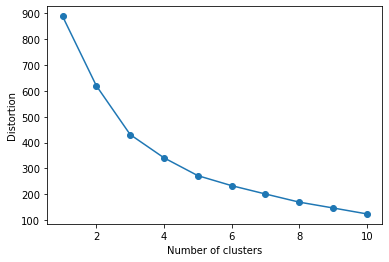

In [450]:
plot_distortion(df_after_scaled)

In [451]:
pca = PCA(n_components=2).fit(df_after_scaled)
pca_2d = pca.transform(df_after_scaled)

In [459]:
#Fitting data into K-means model with 4 clusters
km = KMeans(n_clusters=8,
           n_init=15,
           random_state=0)
y_km = km.fit_predict(df_s)
print(km.cluster_centers_)

[[ 0.97168305  3.53966658]
 [-0.33390161 -0.40383173]
 [ 1.6125544   7.41519264]
 [ 2.18880008 -0.38441327]
 [-1.39261263 -0.32916256]
 [ 0.71815152 -0.45089465]
 [-0.15192258  0.54305122]
 [ 1.17259113  0.80681644]]


In [460]:
# count of points in each cluster
cluster_name = pd.Series(km.labels_)

In [461]:
df_after_scaled['cluster'] = cluster_name

In [462]:
df_after_scaled.head()

,saving_num_trans,saved_amount,BS,100,cluster
0,-0.126954,0.097373,1,1,6
1,0.513918,1.427297,1,1,7
2,-0.218507,-0.499421,1,1,1
3,-0.493166,-0.700170,1,1,1
4,-1.408696,-0.341323,1,1,4


In [463]:
pca_2d

array([[-1.20067678e-02,  2.15349115e-01],
       [ 1.38283352e+00,  6.85044542e-01],
       [-4.99836515e-01, -1.33065982e-01],
       [-8.35719938e-01, -7.90398997e-02],
       [-1.22611351e+00,  8.11941110e-01],
       [-1.68139747e-02, -1.39484060e+00],
       [-1.20614411e+00,  8.31408719e-01],
       [-1.22527221e+00,  8.12761268e-01],
       [-2.77815892e-01,  4.64845149e-01],
       [ 2.12882398e-01, -4.55508078e-01],
       [ 8.81096130e-01, -6.94180551e-01],
       [-3.49973516e-01, -1.14125215e-01],
       [-4.13553421e-01, -1.76107485e-01],
       [-1.81893250e-02,  2.09321913e-01],
       [ 5.31591317e-01, -9.07746539e-01],
       [-6.72739336e-02,  4.15783658e-01],
       [ 1.66218425e-03, -4.07107799e-01],
       [-5.10432549e-01,  3.65230155e-01],
       [-1.09968995e-01,  1.19848480e-01],
       [ 7.70049993e-01,  7.23441418e-01],
       [ 3.57107547e-01,  5.75188335e-01],
       [ 2.42104158e-01,  4.63074748e-01],
       [-1.22607438e+00,  8.11979257e-01],
       [ 1.

In [464]:
# check the cluster labels
y_km

array([6, 7, 1, 1, 4, 5, 4, 4, 1, 5, 5, 1, 1, 6, 5, 6, 5, 1, 1, 6, 6, 6,
       4, 7, 1, 5, 1, 5, 0, 6, 7, 5, 4, 1, 5, 5, 6, 1, 1, 6, 5, 6, 4, 0,
       1, 7, 5, 4, 5, 1, 7, 4, 4, 6, 0, 4, 6, 4, 5, 1, 7, 5, 4, 5, 1, 5,
       4, 3, 7, 5, 1, 7, 7, 5, 1, 5, 4, 6, 1, 6, 1, 1, 4, 6, 5, 5, 6, 5,
       7, 1, 4, 1, 4, 4, 7, 1, 4, 1, 4, 4, 5, 4, 6, 6, 7, 6, 4, 1, 5, 1,
       2, 6, 7, 3, 6, 1, 1, 1, 5, 1, 1, 1, 5, 5, 4, 6, 1, 6, 3, 1, 5, 1,
       3, 6, 1, 4, 1, 3, 3, 1, 7, 1, 4, 1, 5, 1, 5, 5, 4, 1, 5, 6, 3, 1,
       1, 6, 6, 1, 1, 4, 6, 1, 4, 1, 4, 1, 4, 4, 4, 7, 6, 5, 6, 5, 1, 1,
       5, 6, 5, 6, 6, 5, 1, 1, 0, 4, 1, 1, 1, 5, 5, 7, 7, 1, 7, 1, 5, 7,
       4, 4, 4, 4, 6, 5, 4, 4, 4, 3, 4, 1, 4, 6, 5, 1, 7, 1, 5, 6, 6, 4,
       4, 6, 1, 1, 6, 6, 6, 4, 4, 1, 1, 4, 4, 1, 4, 4, 4, 7, 4, 4, 5, 6,
       6, 6, 5, 4, 5, 3, 6, 3, 5, 1, 5, 6, 4, 1, 5, 1, 4, 1, 1, 1, 1, 6,
       1, 7, 7, 1, 4, 6, 5, 1, 6, 1, 6, 3, 4, 4, 7, 5, 5, 4, 3, 1, 0, 5,
       6, 6, 1, 3, 5, 7, 7, 7, 1, 5, 5, 5, 1, 4, 1,

In [465]:
# check the centroids
km.cluster_centers_

array([[ 0.97168305,  3.53966658],
       [-0.33390161, -0.40383173],
       [ 1.6125544 ,  7.41519264],
       [ 2.18880008, -0.38441327],
       [-1.39261263, -0.32916256],
       [ 0.71815152, -0.45089465],
       [-0.15192258,  0.54305122],
       [ 1.17259113,  0.80681644]])

In [323]:
# df_s.to_csv('saving_df_s', index=False)

In [324]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2).fit(df_s)
# pca_2d = pca.transform(df_s)

In [325]:
# X1 = df_s.iloc[:0:4]
# X1 = X1.to_numpy()

In [326]:
# y_km = km.fit_predict(pca_2d)

In [466]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='*',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

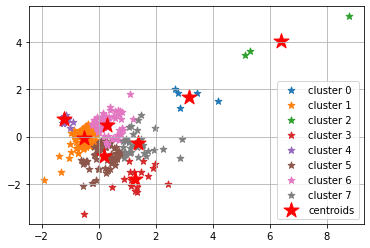

In [467]:
plot_clusters(pca_2d, y_km, plt_cluster_centers = True)

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=go.Scatterpolar(
#   r=[1, 5, 2, 2, 3],
#   theta=['processing cost','mechanical properties','chemical stability', 'thermal stability',
#            'device integration'],
#   fill='toself'
# ))

# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True
#     ),
#   ),
#   showlegend=False
# )

# fig.show()

In [474]:
df_after_scaled.head(1)

,saving_num_trans,saved_amount,BS,100,cluster
0,-0.126954,0.097373,1,1,6


In [476]:
df_after_scaled.groupby('cluster').count()

,saving_num_trans,saved_amount,BS,100
cluster,,,,
0,5,5,5,5
1,96,96,96,96
2,3,3,3,3
3,17,17,17,17
4,74,74,74,74
5,78,78,78,78
6,66,66,66,66
7,36,36,36,36


In [479]:
df_mean = df_after_scaled.groupby('cluster').mean()
df_mean

,saving_num_trans,saved_amount,BS,100
cluster,,,,
0,0.971683,3.539667,0.400000,0.400000
1,-0.333902,-0.403832,0.739583,0.739583
2,1.612554,7.415193,1.000000,1.000000
3,2.188800,-0.384413,0.764706,0.764706
4,-1.392613,-0.329163,0.797297,0.797297
5,0.718152,-0.450895,0.717949,0.717949
6,-0.151923,0.543051,0.833333,0.833333
7,1.172591,0.806816,0.666667,0.666667


In [487]:
fig = go.Figure()
for i in range(0,len(df_mean)):
#     fig = px.line_polar(df_after_scaled, r=df_mean.iloc[i].values, theta=df_mean.iloc[i].index, line_close=True)
#     fig.add_trace(go.Scatterpolar)
    
    fig.add_trace(go.Scatterpolar(
      r=df_mean.iloc[i].values,
      theta=df_mean.iloc[i].index,
      fill='toself',
      name=f"cluster {df_mean.index[i]}"))
fig.show()

In [330]:
chosen_col = ['saving_num_trans', 'saved_amount', 'BS', 'MS', '100', '500']
df_s_data_frame = pd.DataFrame(df_saving_3)

In [331]:
df_saving_3

,saving_num_trans,saved_amount,BS,MM,100,500,cluster
0,26,480.88,1,0,1,0,0
1,33,1927.41,1,0,1,0,2
2,25,-168.24,1,0,1,0,0
3,22,-386.59,1,0,1,0,0
4,12,3.72,1,0,1,0,0
...,...,...,...,...,...,...,...
370,33,364.55,1,0,1,0,2
371,12,2.36,1,0,1,0,0
372,12,34.24,1,0,1,0,0
373,25,163.72,1,0,1,0,0


In [332]:
#df_s = sc.fit_transform(df_saving_3)
df_s_data_frame = pd.DataFrame(sc.fit_transform(df_s_data_frame), columns = chosen_col)

ValueError: Shape of passed values is (375, 7), indices imply (375, 6)

In [259]:
chosen_col = ['saving_num_trans', 'saved']

AttributeError: 'Index' object has no attribute 'list'

In [311]:
df_s_data_frame.head()

,saving_num_trans,saved_amount,BS,MS,100,500
0,-0.126954,0.097373,0.570165,-0.570165,0.570165,-0.570165
1,0.513918,1.427297,0.570165,-0.570165,0.570165,-0.570165
2,-0.218507,-0.499421,0.570165,-0.570165,0.570165,-0.570165
3,-0.493166,-0.700170,0.570165,-0.570165,0.570165,-0.570165
4,-1.408696,-0.341323,0.570165,-0.570165,0.570165,-0.570165


In [309]:
fig = px.line_polar(df_s_data_frame)

In [310]:
fig.show()

In [277]:
# chosen_col = ['saving_num_trans', 'saved_amount', 'BS', 'MS', '100', '500']
# # le = preprocessing.LabelEncoder()
# scaler = MinMaxScaler()
# scaled_sum_df = pd.DataFrame(scaler.fit_transform(df_saving_3), columns = chosen_col)

In [276]:
# scaled_sum_df

In [275]:
# import plotly.graph_objects as go
# #assign cluster to customers
# scaled_sum_df['cluster'] = KMeans(n_clusters=4, n_init=10).fit_predict(scaled_sum_df)
# # clusters size
# scaled_sum_df['cluster'].value_counts()
# # data to radar chart
# df_radar = scaled_sum_df.groupby('cluster').mean().divide(scaled_sum_df.drop('cluster',axis=1).mean())*100

# def plot_radar_chart(df):
#     data = []
#     for i in range(0,len(df)):
#         data.append(go.Scatterpolar(r = df.iloc[i].values,
#                                     theta = df.iloc[i].index,
#                                     name = f'cluster_{df.index[i]}',
#                                     fill = 'toself'))
#     # mean line
#     data.append(go.Scatterpolar(r = [100]* df.shape[1],
#                                 theta= df.columns,
#                                 name = 'mean',
#                                 fill = 'toself'))
#     layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
#                        showlegend = True)
#     fig = go.Figure(data = data, layout = layout)
#     fig.show()
# plot_radar_chart(df_radar)

In [177]:
df_s

array([[-0.12695356,  0.09737282,  0.57016519, -0.57016519,  0.57016519,
        -0.57016519],
       [ 0.51391779,  1.42729738,  0.57016519, -0.57016519,  0.57016519,
        -0.57016519],
       [-0.21850661, -0.49942133,  0.57016519, -0.57016519,  0.57016519,
        -0.57016519],
       ...,
       [-1.40869628, -0.31326333,  0.57016519, -0.57016519,  0.57016519,
        -0.57016519],
       [-0.21850661, -0.19422077,  0.57016519, -0.57016519,  0.57016519,
        -0.57016519],
       [ 0.78857694,  0.07933439,  0.57016519, -0.57016519,  0.57016519,
        -0.57016519]])

In [215]:
df_s[y_km == cluster,0]

NameError: name 'cluster' is not defined

In [231]:
df_saving_x = df_saving_3.copy(deep=True)

In [232]:
df_saving_x.head()

,saving_num_trans,saved_amount,BS,MM,100,500
0,26,480.88,1,0,1,0
1,33,1927.41,1,0,1,0
2,25,-168.24,1,0,1,0
3,22,-386.59,1,0,1,0
4,12,3.72,1,0,1,0


In [233]:
df_saving_x.columns

Index(['saving_num_trans', 'saved_amount', 'BS  ', 'MM  ', 100, 500], dtype='object')

In [237]:
df_saving_x.columns = df_saving_x.columns.str.replace(' ', '')

In [235]:
df_saving_x.columns = df_saving_x.columns.map(str)

In [238]:
df_saving_x.columns

Index(['saving_num_trans', 'saved_amount', 'BS', 'MM', '100', '500'], dtype='object')

In [239]:
df_saving_xx = df_saving_x.drop(columns = ['MM', '500'])

In [280]:
# chosen_col = ['saving_num_trans', 'saved_amount', 'BS', 'MS', '100', '500']
# # le = preprocessing.LabelEncoder()
# scaler = MinMaxScaler()
# scaled_sum_df = pd.DataFrame(scaler.fit_transform(df_saving_3), columns = chosen_col)
df_saving_xx.head()

,saving_num_trans,saved_amount,BS,100
0,26,480.88,1,1
1,33,1927.41,1,1
2,25,-168.24,1,1
3,22,-386.59,1,1
4,12,3.72,1,1


In [283]:
col_name = ['saving_num_trans', 'saved_amount', 'BS','100']

In [285]:
df_s_x = pd.DataFrame(scaler.fit_transform(df_saving_xx), columns = col_name)

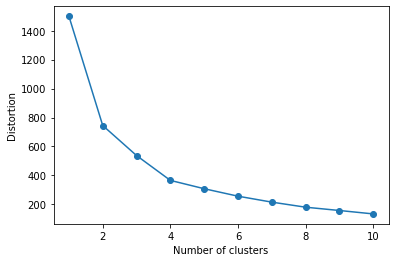

In [247]:
plot_distortion(df_s_x)

In [289]:
df_s_x

,saving_num_trans,saved_amount,BS,100
0,0.28,0.214083,1.0,1.0
1,0.42,0.321344,1.0,1.0
2,0.26,0.165951,1.0,1.0
3,0.20,0.149760,1.0,1.0
4,0.00,0.178702,1.0,1.0
...,...,...,...,...
370,0.42,0.205457,1.0,1.0
371,0.00,0.178601,1.0,1.0
372,0.00,0.180965,1.0,1.0
373,0.26,0.190566,1.0,1.0


In [286]:
pcax = PCA(n_components=2).fit(df_s_x)
pca_2dx = pcax.transform(df_s_x)

In [287]:
#Fitting data into K-means model with 4 clusters
km = KMeans(n_clusters=4,
           n_init=15,
           random_state=0)
y_km = km.fit_predict(df_s_x)
print(km.cluster_centers_)

[[ 1.59085714e-01  1.97986200e-01  1.00000000e+00  1.00000000e+00]
 [ 5.01739130e-01  2.05920058e-01 -1.11022302e-16 -1.11022302e-16]
 [ 5.30185185e-01  2.32188903e-01  1.00000000e+00  1.00000000e+00]
 [ 1.56956522e-01  1.76953529e-01  2.22044605e-16  2.22044605e-16]]


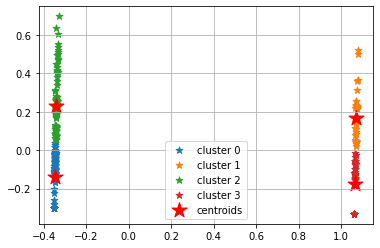

In [288]:
plot_clusters(pca_2dx, y_km, plt_cluster_centers = True)

In [252]:
pca_2dx_df = pd.DataFrame(pca_2dx)

In [253]:
pca_2dx_df

,0,1
0,-0.817122,-0.071476
1,-0.963434,1.309733
2,-0.742420,-0.550185
3,-0.728543,-0.886737
4,-0.818242,-1.297485
...,...,...
370,-0.773408,0.315822
371,-0.818077,-1.298350
372,-0.821953,-1.278076
373,-0.782783,-0.339073


In [278]:
# chosen_col = ['saving_num_trans', 'saved_amount', 'BS', 'MS', '100', '500']
# # le = preprocessing.LabelEncoder()
# scaler = MinMaxScaler()
# scaled_sum_df = pd.DataFrame(scaler.fit_transform(df_saving_3), columns = chosen_col)